In [17]:
import pandas as pd
import datetime
import numpy as np
import mplfinance as mpf
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline

In [2]:
df = pd.read_csv('gold_sp500_btc.csv')

In [4]:
df.head(3)

,Timestamp,Open_gold,High_gold,Low_gold,Close_gold,Volume_gold,Ticker_gold,Close_rolling_3h_gold,Volume_rolling_3h_gold,Close_rolling_6h_gold,...,Close_rolling_3h,Volume_rolling_3h,Close_rolling_6h,Volume_rolling_6h,Close_rolling_1d,Volume_rolling_1d,Close_rolling_3d,Volume_rolling_3d,Close_rolling_1w,Volume_rolling_1w
0,2022-11-10 14:30:00+00:00,162.009995,163.190002,161.654999,162.994995,0,GLD,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-10 15:30:00+00:00,163.000000,163.220001,162.309998,162.699997,2247057,GLD,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-10 16:30:00+00:00,162.699997,163.009995,162.679993,162.869995,749521,GLD,162.854996,998859.333333,NaN,...,17630.41862,314925056.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
columns_list = df.columns.tolist()
print(columns_list)

['Open_gold', 'High_gold', 'Low_gold', 'Close_gold', 'Volume_gold', 'Ticker_gold', 'Close_rolling_3h_gold', 'Volume_rolling_3h_gold', 'Close_rolling_6h_gold', 'Volume_rolling_6h_gold', 'Close_rolling_1d_gold', 'Volume_rolling_1d_gold', 'Close_rolling_3d_gold', 'Volume_rolling_3d_gold', 'Close_rolling_1w_gold', 'Volume_rolling_1w_gold', 'Open_sp500', 'High_sp500', 'Low_sp500', 'Close_sp500', 'Volume_sp500', 'Ticker_sp500', 'Close_rolling_3h_sp500', 'Volume_rolling_3h_sp500', 'Close_rolling_6h_sp500', 'Volume_rolling_6h_sp500', 'Close_rolling_1d_sp500', 'Volume_rolling_1d_sp500', 'Close_rolling_3d_sp500', 'Volume_rolling_3d_sp500', 'Close_rolling_1w_sp500', 'Volume_rolling_1w_sp500', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker', 'Close_rolling_3h', 'Volume_rolling_3h', 'Close_rolling_6h', 'Volume_rolling_6h', 'Close_rolling_1d', 'Volume_rolling_1d', 'Close_rolling_3d', 'Volume_rolling_3d', 'Close_rolling_1w', 'Volume_rolling_1w']


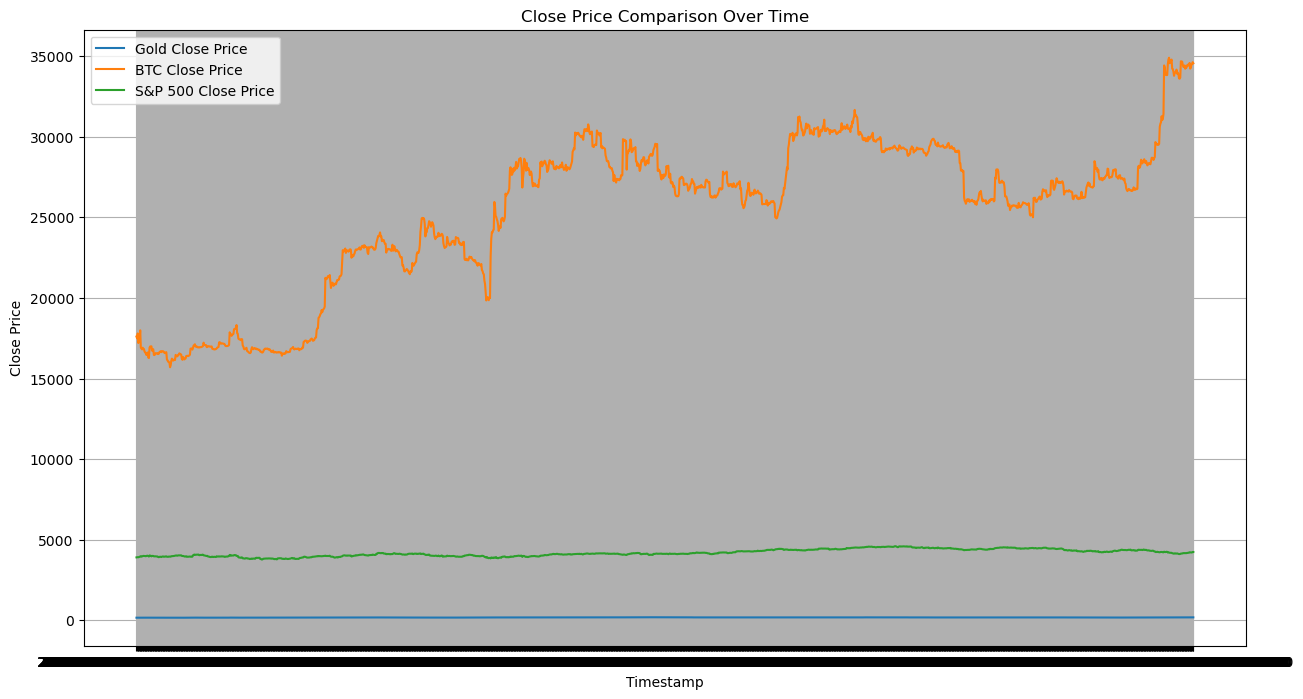

In [6]:
# Plotting
plt.figure(figsize=(15, 8))

# Plotting Close prices for each Gold, BTC, and S&P 500
plt.plot(df['Timestamp'], df['Close_gold'], label='Gold Close Price')
plt.plot(df['Timestamp'], df['Close'], label='BTC Close Price')  # Assuming 'Close' is for BTC
plt.plot(df['Timestamp'], df['Close_sp500'], label='S&P 500 Close Price')

plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.title('Close Price Comparison Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# if need to revert
original_df = df.copy()

In [13]:
# Ensure that 'Timestamp' is in datetime format and set it as the index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

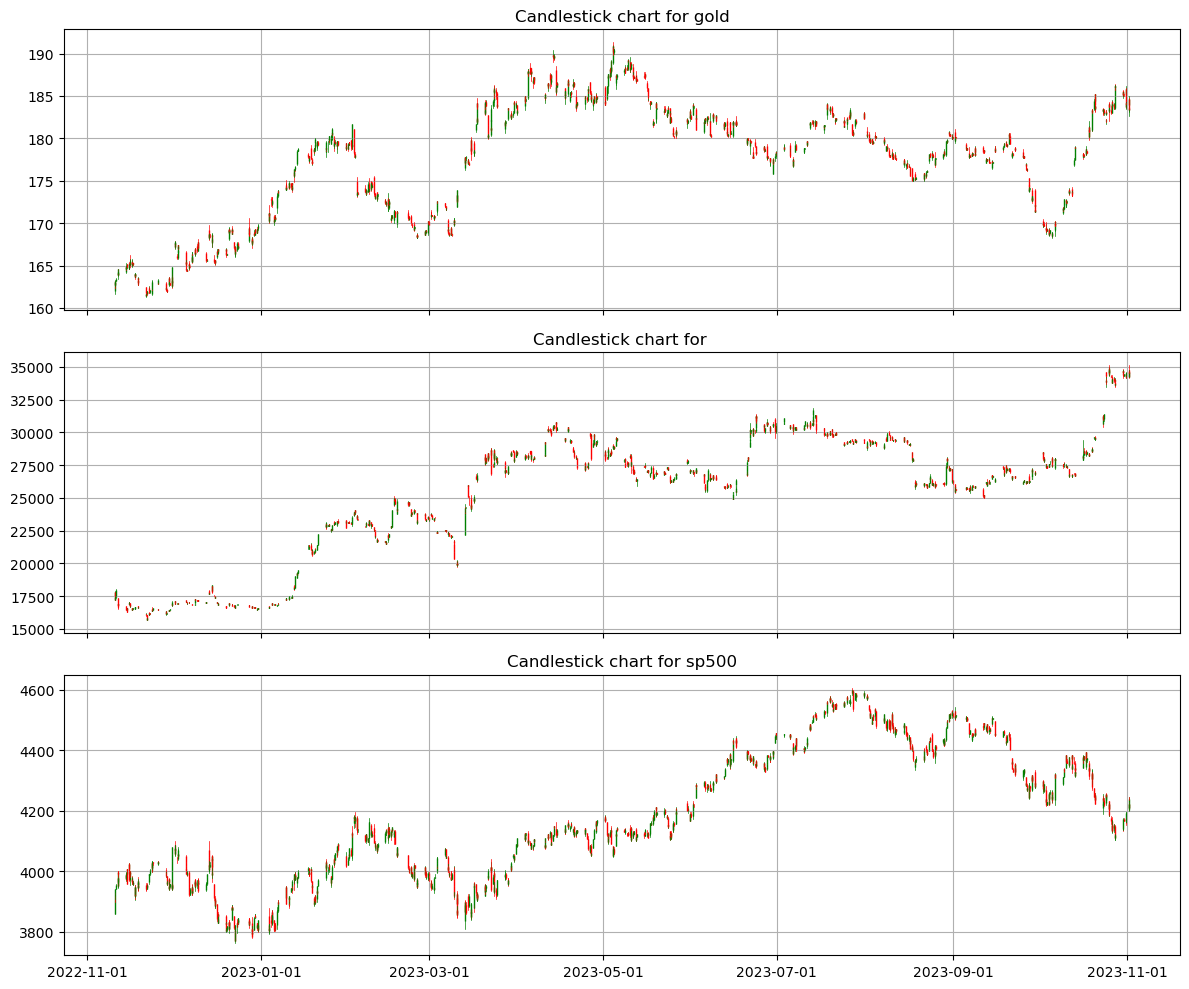

In [18]:
df['Date_Num'] = mdates.date2num(df.index.to_pydatetime())

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Function to plot candlestick chart
def plot_candlestick(ax, data, ticker_suffix):
    quotes = [tuple(x) for x in data[['Date_Num', f'Open{ticker_suffix}', f'High{ticker_suffix}', f'Low{ticker_suffix}', f'Close{ticker_suffix}']].values]
    candlestick_ohlc(ax, quotes, width=0.6/(24*60), colorup='g', colordown='r')
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.set_title(f'Candlestick chart for {ticker_suffix.strip("_")}')
    ax.grid(True)

# Plot Gold
plot_candlestick(axes[0], df, '_gold')

# Plot BTC
plot_candlestick(axes[1], df, '')

# Plot S&P 500
plot_candlestick(axes[2], df, '_sp500')

plt.tight_layout()
plt.show()


In [20]:
'''Calculating Returns: The returns for each stock are calculated using the formula (Current Close Price / Previous Close Price) - 1. This is achieved using the .shift(1) method in pandas, which shifts the 'Close' column down by one row, allowing for the calculation of the daily return compared to the previous day.

For example, tcs['returns'] = (tcs['Close']/tcs['Close'].shift(1)) -1 calculates the daily return for the TCS stock. This calculation is repeated for Infosys and Wipro.

Plotting Histograms: Each stock's returns are then plotted as a histogram using matplotlib. The hist method of a pandas DataFrame is used to create the histogram, with the number of bins set to 100 for each, providing a detailed distribution view.

Histogram Customization: The histograms are customized with labels for each stock, transparency (alpha parameter), and a figure size. The alpha parameter controls the transparency of the plots, making it easier to see overlapping areas when histograms are plotted on the same axes.

Legend: Finally, a legend is added to the plot to distinguish between the three stocks.'''

"Calculating Returns: The returns for each stock are calculated using the formula (Current Close Price / Previous Close Price) - 1. This is achieved using the .shift(1) method in pandas, which shifts the 'Close' column down by one row, allowing for the calculation of the daily return compared to the previous day.\n\nFor example, tcs['returns'] = (tcs['Close']/tcs['Close'].shift(1)) -1 calculates the daily return for the TCS stock. This calculation is repeated for Infosys and Wipro.\n\nPlotting Histograms: Each stock's returns are then plotted as a histogram using matplotlib. The hist method of a pandas DataFrame is used to create the histogram, with the number of bins set to 100 for each, providing a detailed distribution view.\n\nHistogram Customization: The histograms are customized with labels for each stock, transparency (alpha parameter), and a figure size. The alpha parameter controls the transparency of the plots, making it easier to see overlapping areas when histograms are plo

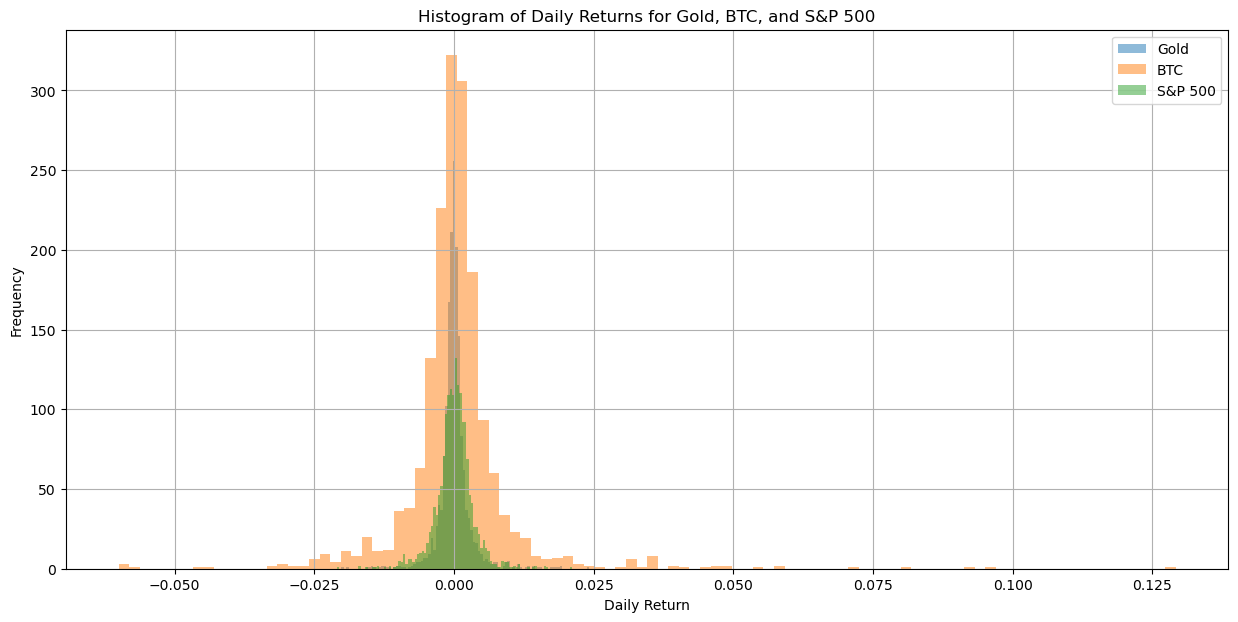

In [21]:
# Calculate returns for Gold, BTC, and S&P 500
df['returns_gold'] = (df['Close_gold'] / df['Close_gold'].shift(1)) - 1
df['returns_btc'] = (df['Close'] / df['Close'].shift(1)) - 1  # Assuming 'Close' is for BTC
df['returns_sp500'] = (df['Close_sp500'] / df['Close_sp500'].shift(1)) - 1

# Plot histograms
df['returns_gold'].hist(bins=100, label='Gold', alpha=0.5, figsize=(15,7))
df['returns_btc'].hist(bins=100, label='BTC', alpha=0.5)
df['returns_sp500'].hist(bins=100, label='S&P 500', alpha=0.5)

# Adding labels
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# Adding a title
plt.title('Histogram of Daily Returns for Gold, BTC, and S&P 500')

# Adding a legend
plt.legend()

plt.show()


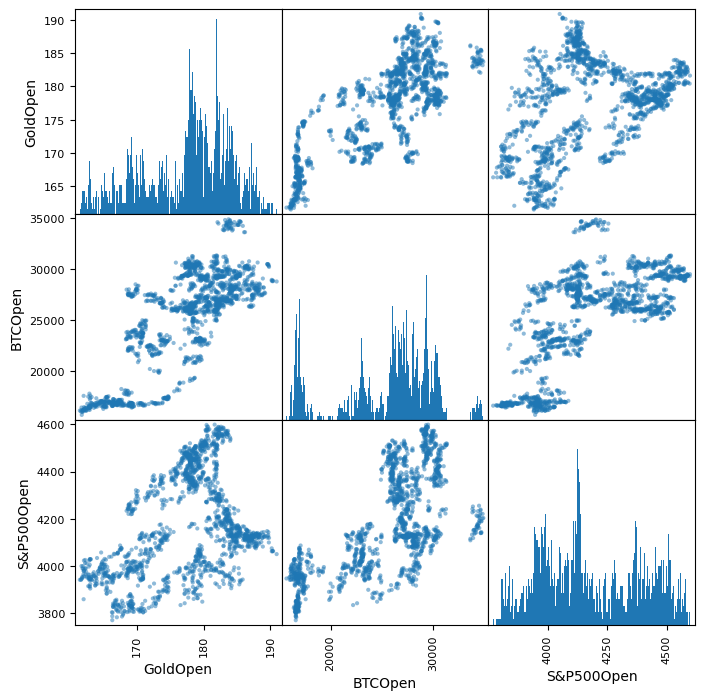

In [22]:
# Concatenating the 'Open' prices of Gold, BTC, and S&P 500
data = pd.concat([df['Open_gold'], df['Open'], df['Open_sp500']], axis=1)
data.columns = ['GoldOpen', 'BTCOpen', 'S&P500Open']

# Creating a scatter plot matrix
scatter_matrix(data, figsize=(8, 8), hist_kwds={'bins': 250}, alpha=0.5)

plt.show()
